In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
data = pd.read_csv('Heart diseases prediction.csv')

In [3]:
data.head()

,age,sexe,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,64,1,0,128,263,0,1,105,1,0.2,1,1,3,1
1,46,0,2,142,177,0,0,160,1,1.4,0,0,2,1
2,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
3,66,1,0,160,228,0,0,138,0,2.3,2,0,1,1
4,57,1,0,165,289,1,0,124,0,1.0,1,3,3,0


In [4]:
data.isnull().any()

age         False
sexe        False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

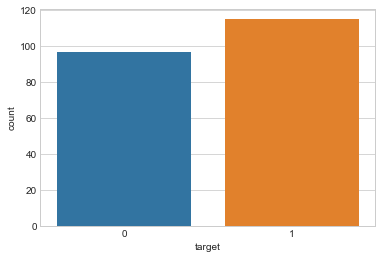

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=data)


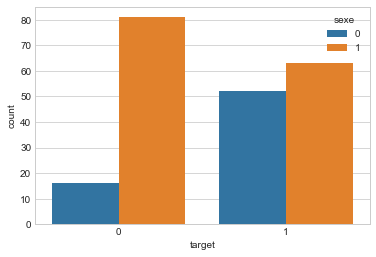

In [65]:
sns.countplot(x='target', hue='sexe',data=data)


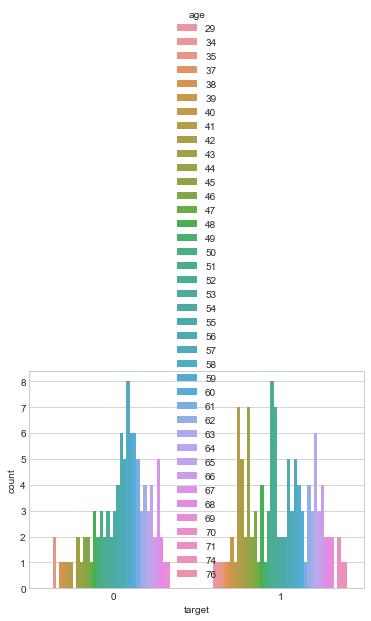

In [67]:
sns.countplot(x='target',hue='age',data=data)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


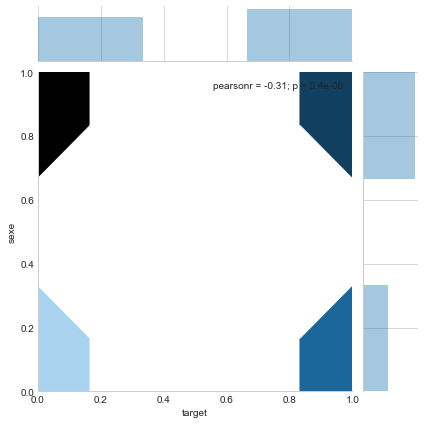

In [8]:
sns.jointplot(x='target',y='sexe',data=data, kind ='hex')


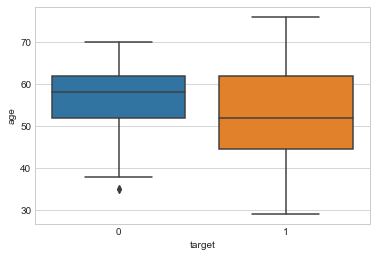

In [9]:
sns.boxplot(x='target',y='age',data=data)

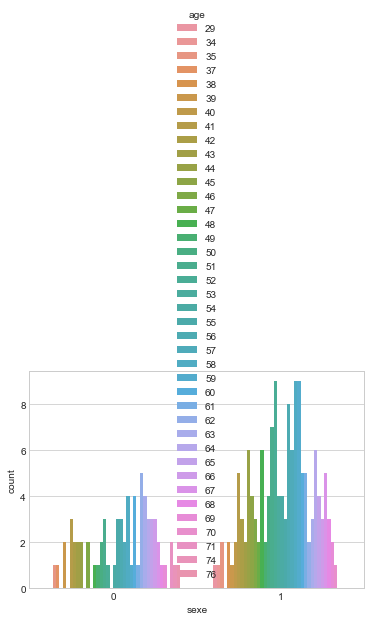

In [69]:
sns.countplot(x='sexe',hue='age',data=data)

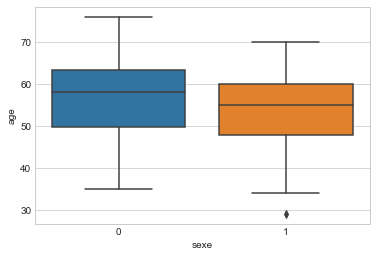

In [11]:
sns.boxplot(x='sexe',y='age',data=data)

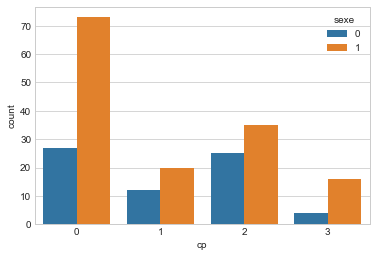

In [70]:
sns.countplot(x='cp',hue='sexe',data=data)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


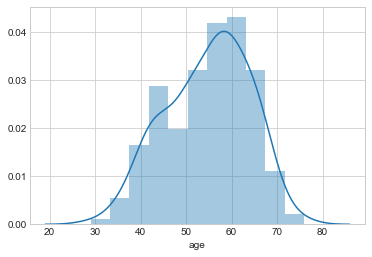

In [73]:
sns.distplot(data['age'])

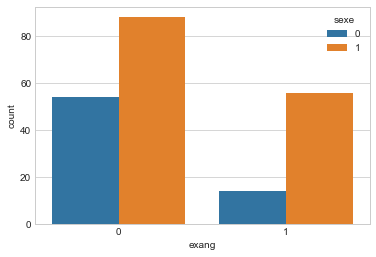

In [74]:
sns.countplot(x='exang',hue='sexe',data=data)

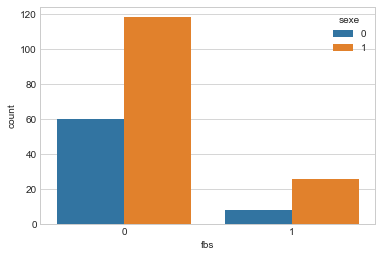

In [76]:
sns.countplot(x='fbs',hue='sexe',data=data)

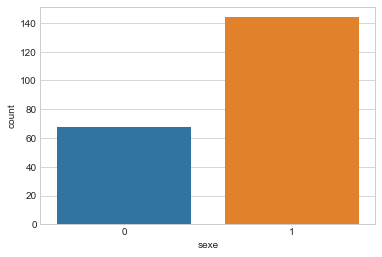

In [17]:
sns.countplot(x='sexe',data=data)

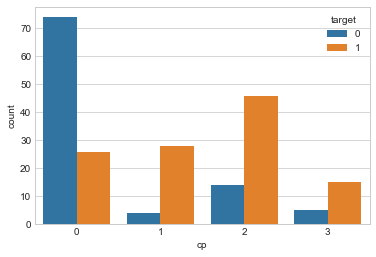

In [77]:
sns.countplot(x='cp', hue= 'target', data=data)

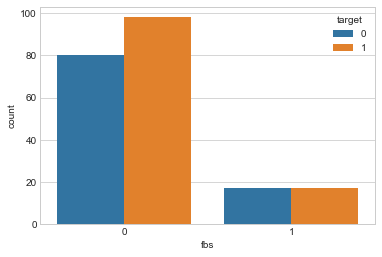

In [78]:
sns.countplot(x='fbs', hue= 'target',data=data)

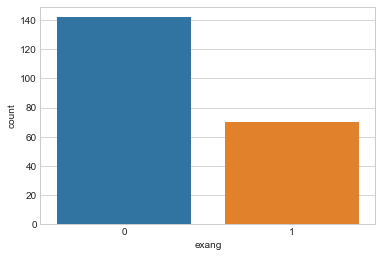

In [21]:
sns.countplot(x='exang',data=data)

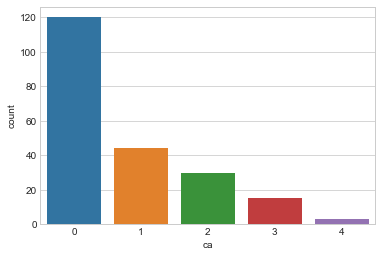

In [22]:
sns.countplot(x='ca',data=data)

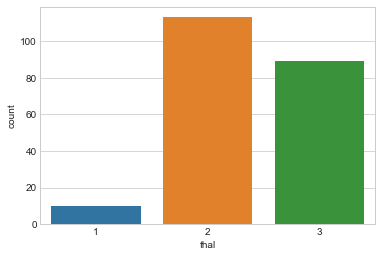

In [23]:
sns.countplot(x='thal',data=data)

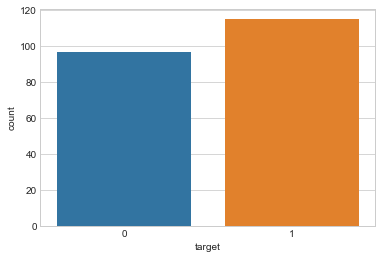

In [24]:
sns.countplot(x='target',data=data)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


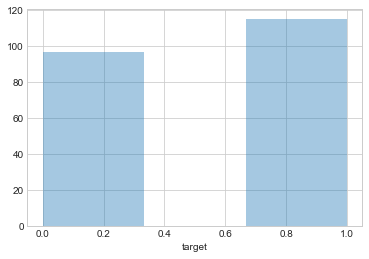

In [25]:
sns.distplot( data['target'], kde = False)

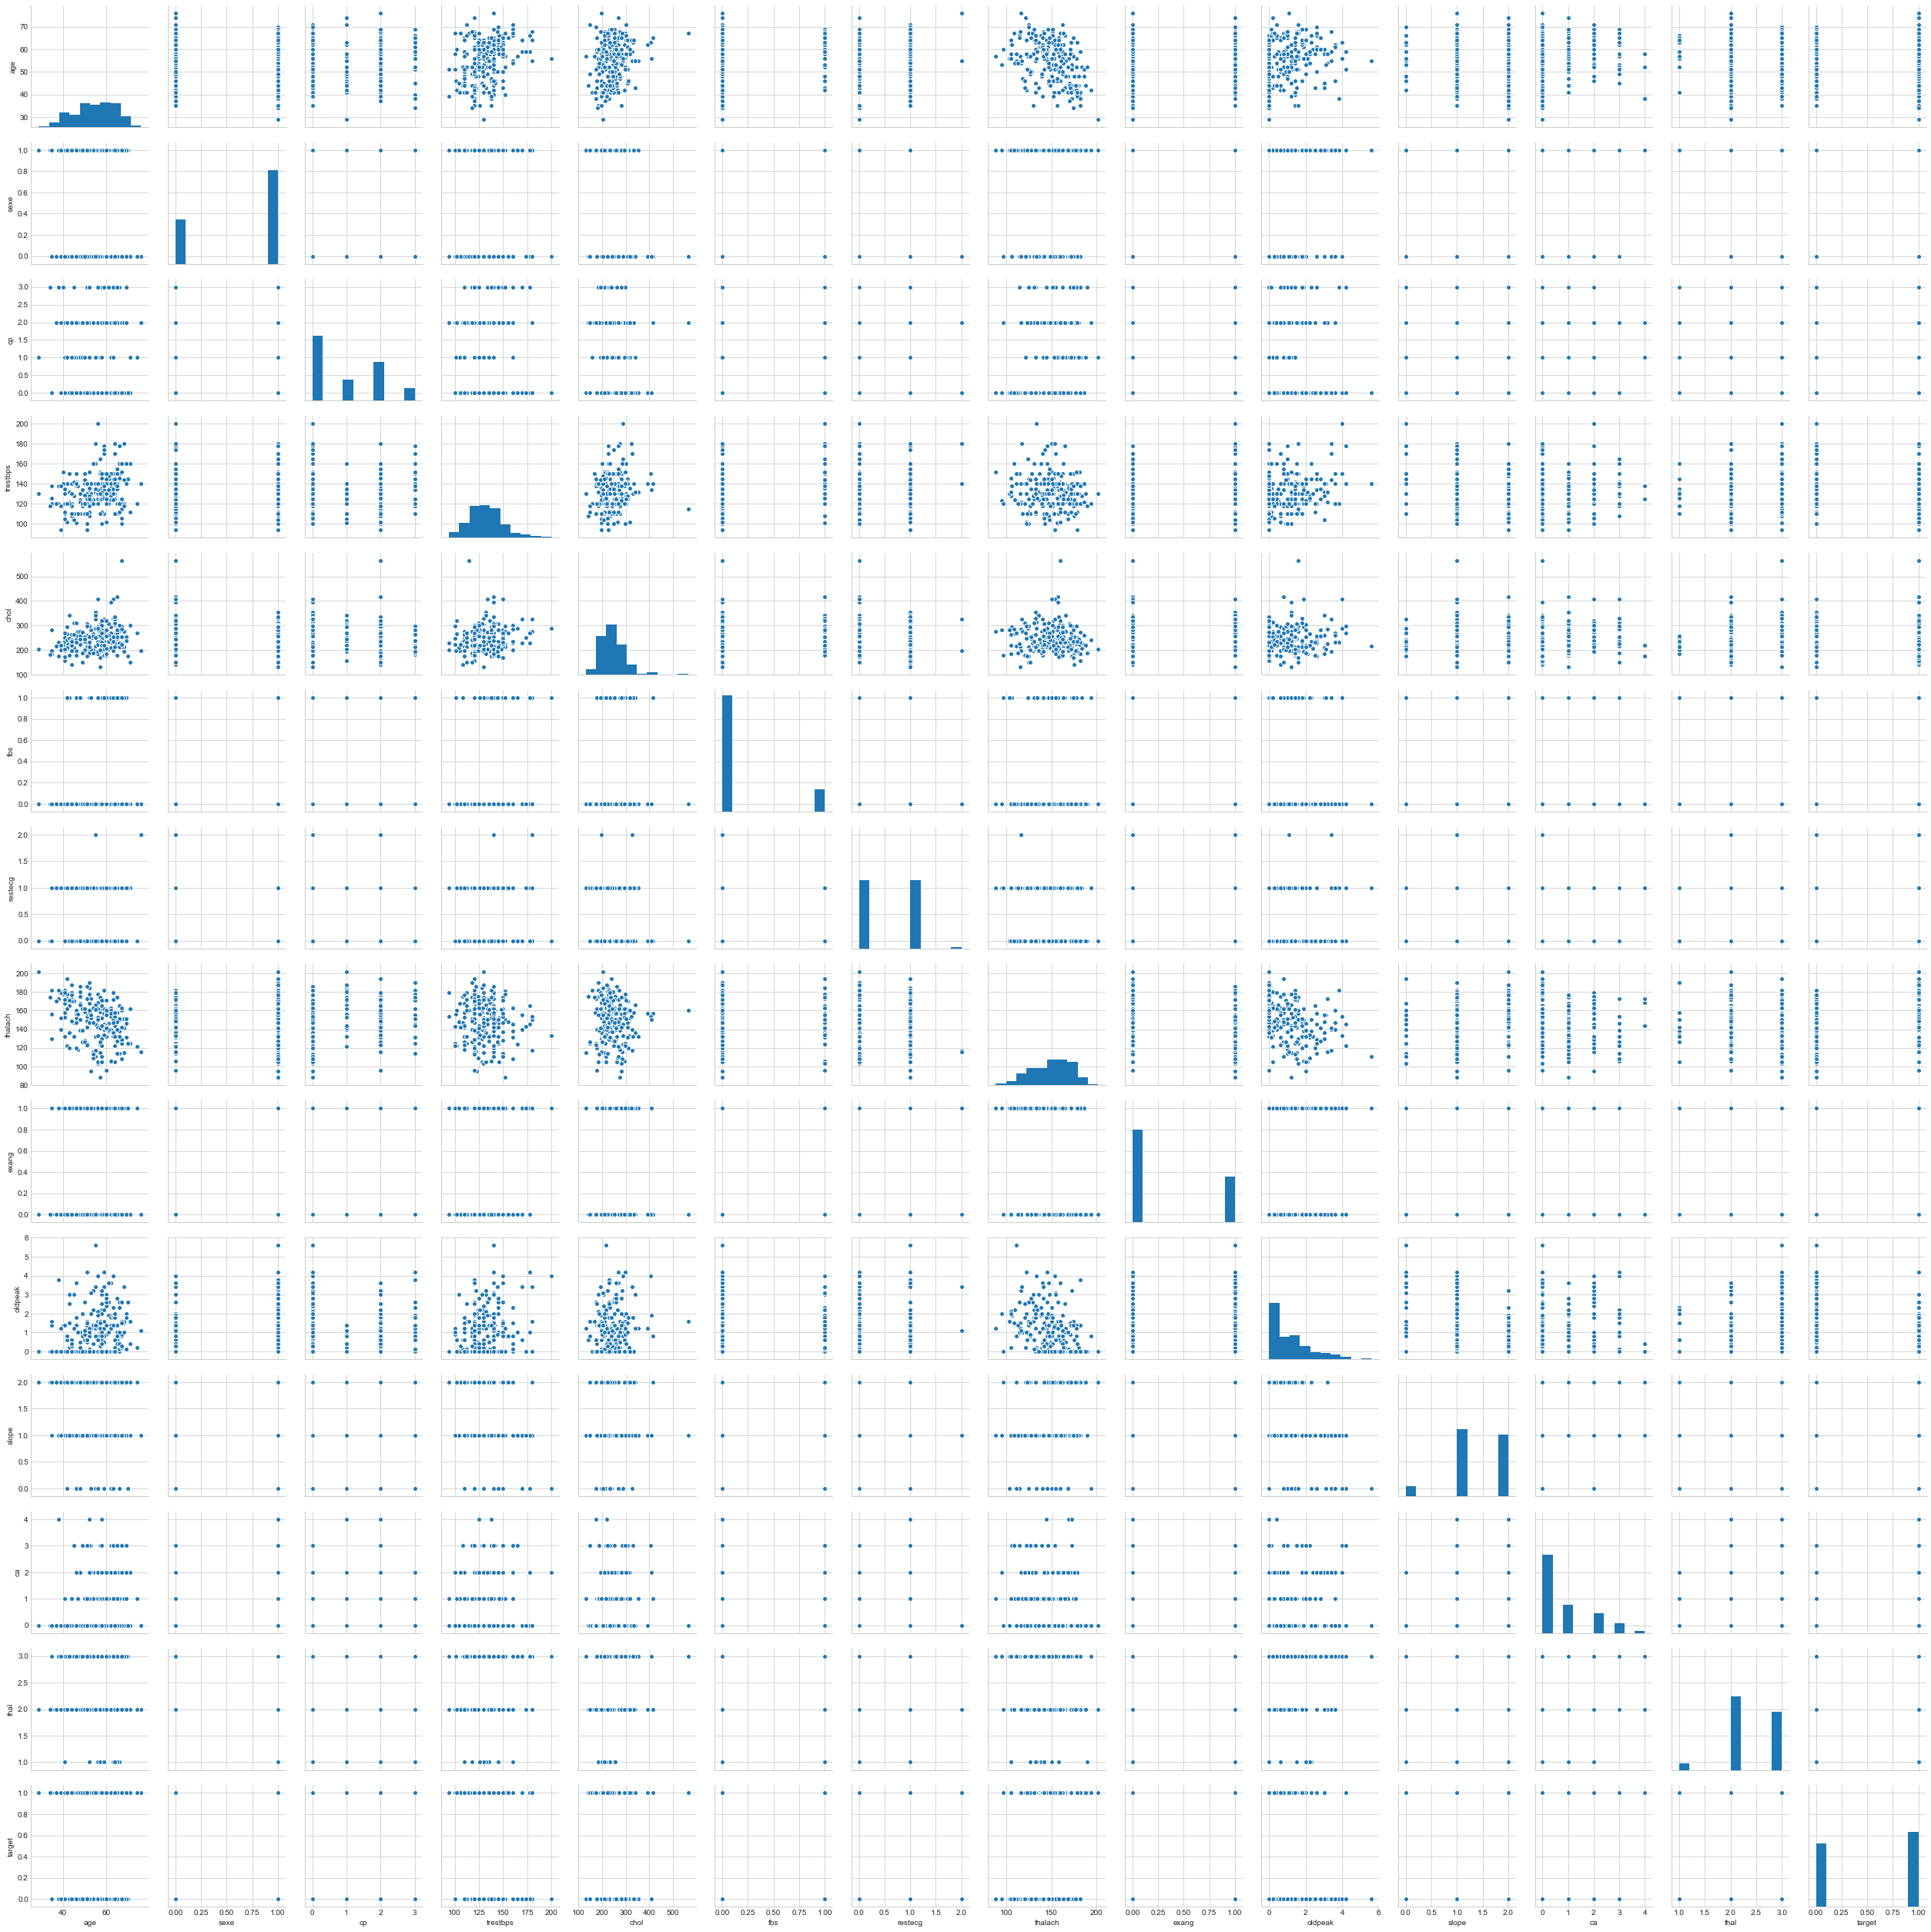

In [26]:
sns.pairplot(data)

In [27]:
data.columns

Index(['age', 'sexe', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [28]:
X = data[['age', 'sexe', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]

In [29]:
y = data['target']

In [30]:
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression()

In [34]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
predictions = model.predict(X_test)
predictions

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1],
      dtype=int64)

In [36]:
y_test

54     0
69     1
90     1
179    0
150    0
153    0
55     0
93     0
118    0
211    1
33     0
37     0
187    0
149    0
100    0
158    1
145    0
159    0
173    0
41     0
50     0
186    0
42     1
112    1
121    1
66     1
183    0
208    0
172    1
34     1
31     1
25     0
139    1
114    1
2      1
12     0
142    0
175    0
22     0
48     1
39     0
32     1
148    1
Name: target, dtype: int64

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.96      0.85      0.90        26
          1       0.80      0.94      0.86        17

avg / total       0.89      0.88      0.88        43



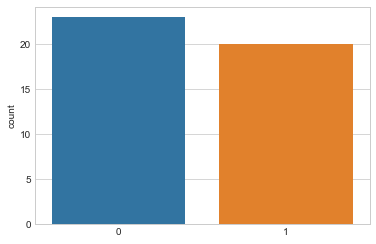

In [39]:
sns.countplot(predictions)

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(y_test,predictions)

array([[22,  4],
       [ 1, 16]], dtype=int64)

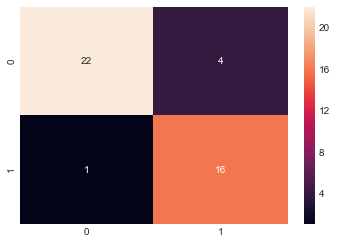

In [42]:
sns.heatmap(confusion_matrix(y_test,predictions), annot=True)

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
Rf = RandomForestClassifier(n_estimators=300)

In [45]:
Rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
pred =Rf.predict(X_test)
pred

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1],
      dtype=int64)

In [47]:
y_test

54     0
69     1
90     1
179    0
150    0
153    0
55     0
93     0
118    0
211    1
33     0
37     0
187    0
149    0
100    0
158    1
145    0
159    0
173    0
41     0
50     0
186    0
42     1
112    1
121    1
66     1
183    0
208    0
172    1
34     1
31     1
25     0
139    1
114    1
2      1
12     0
142    0
175    0
22     0
48     1
39     0
32     1
148    1
Name: target, dtype: int64

In [48]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.96      0.85      0.90        26
          1       0.80      0.94      0.86        17

avg / total       0.89      0.88      0.88        43



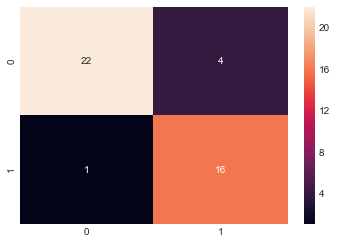

In [49]:
sns.heatmap(confusion_matrix(y_test,pred), annot=True)

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dtree= DecisionTreeClassifier()

In [52]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [53]:
preds = dtree.predict(X_test)
preds

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1],
      dtype=int64)

In [54]:
y_test

54     0
69     1
90     1
179    0
150    0
153    0
55     0
93     0
118    0
211    1
33     0
37     0
187    0
149    0
100    0
158    1
145    0
159    0
173    0
41     0
50     0
186    0
42     1
112    1
121    1
66     1
183    0
208    0
172    1
34     1
31     1
25     0
139    1
114    1
2      1
12     0
142    0
175    0
22     0
48     1
39     0
32     1
148    1
Name: target, dtype: int64

In [55]:
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          0       0.77      0.88      0.82        26
          1       0.77      0.59      0.67        17

avg / total       0.77      0.77      0.76        43



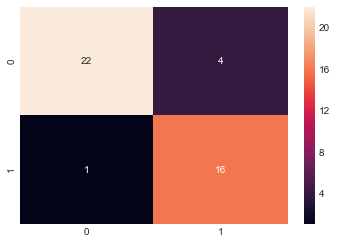

In [56]:
sns.heatmap(confusion_matrix(y_test,predictions), annot=True)

In [57]:
from sklearn.svm import SVC

In [58]:
from sklearn.grid_search import GridSearchCV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [59]:
param_grid ={'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(), param_grid, verbose = 5)
grid.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.578947 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.578947 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.581818 -   0.0s

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s



[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.578947 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.578947 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.581818 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.578947 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.578947 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.581818 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.578947 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=5)

In [60]:
grid.best_params_

{'C': 100, 'gamma': 0.0001}

In [61]:
grid.pred = grid.predict(X_test)

In [62]:
grid.pred

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
      dtype=int64)

In [63]:
print(classification_report(y_test, grid.pred))

             precision    recall  f1-score   support

          0       1.00      0.62      0.76        26
          1       0.63      1.00      0.77        17

avg / total       0.85      0.77      0.77        43

